In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\wlgan\credit_risk_modelling\loan_data_2007_2014.csv")


C:\Users\wlgan\AppData\Local\Temp\ipykernel_19144\4116658697.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\wlgan\credit_risk_modelling\loan_data_2007_2014.csv")


In [3]:
df.head(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
loan_data = df.copy()

In [23]:
pd.options.display.max_columns = None
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [24]:
loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [51]:
loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [53]:
string = "10+ years"
regex_str = string.replace(r"\d+ years", r'\1', regex=True)
regex_str

TypeError: str.replace() takes no keyword arguments

In [70]:
loan_data["emp_length_int"] = loan_data["emp_length"].str.replace(r"(\d)\+ years", r'\1', regex=True)
print(loan_data["emp_length_int"].unique())
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("< 1 year", str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("n/a", str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("years", "")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("year", "")

['10' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [71]:
loan_data["emp_length_int"].unique()

array(['10', '0', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

In [69]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'column_name': ['10+ years', '>= 5 years', '3 years', '>= 15 years', '< 2 years', 'unknown', '12+ years']})
print(df)
# Replace only values that contain '>=' and extract the number
df['column_name'] = df['column_name'].str.replace(r'(\d)\+ years', r'\1', regex=True)

print(df)


   column_name
0    10+ years
1   >= 5 years
2      3 years
3  >= 15 years
4    < 2 years
5      unknown
6    12+ years
   column_name
0           10
1   >= 5 years
2      3 years
3  >= 15 years
4    < 2 years
5      unknown
6           12


In [ ]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'column_name': ['10+ years', '>= 5 years', '3 years', '>= 15 years', '< 2 years', 'unknown', '12+ years']})

# Replace only values that contain '>= <number> years' and extract the number
df['column_name'] = df['column_name'].str.replace(r'(\d+) years', r'\1', regex=True)

print(df)


  column_name
0   10+ years
1        >= 5
2           3
3       >= 15
4         < 2
5     unknown
6   12+ years


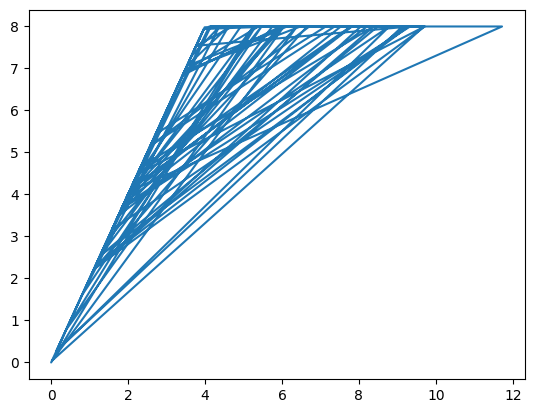

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("trainingdata.txt")
plt.plot(df.iloc[:,0], df.iloc[:,1])
plt.show()
#print(df)

In [1]:
# Python3 program for the above approach

# Function to return the count
# of minimum flips required
def minFlips(target):

	curr = '1'
	count = 0
	
	for i in range(len(target)):
		
		# If curr occurs in the final string
		if (target[i] == curr):
			count += 1
			
			# Switch curr to '0' if '1'
			# or vice-versa
			curr = chr(48 + (ord(curr) + 1) % 2)
	
	return count

# Driver Code
if __name__ == "__main__":
	
	S = "011000"
	
	print(minFlips(S))

# This code is contributed by chitranayal


2


In [ ]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb

# Load training data
train_data = pd.read_csv("train.csv", header=None)

# Split features (X) and target (y)
X = train_data.iloc[:, :-1].values  # First 500 columns (stock prices)
y = train_data.iloc[:, -1].values   # Last column (S&P 500 index)

# Load test data
test_data = pd.read_csv("test.csv", header=None)
X_test = test_data.values  # Test dataset has only features

# Standardize the data (helps models perform better)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Split training data into train & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=79)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)

# Compute metrics
rmse = root_mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print results
print(f"Validation RMSE: {rmse:.4f}")
print(f"Validation MAE: {mae:.4f}")
print(f"Validation R²: {r2:.4f}")

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Save predictions to a CSV file
pd.DataFrame(y_test_pred).to_csv("prediction_1.csv", index=False, header=False)


Validation RMSE: 0.6054
Validation MAE: 0.4339
Validation R²: 0.9964
